In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/gabriel/Documents/Repos/time_series_study/data_and_models/dadosicocomsucesso/')


## Entendendo melhor os dados provenientes de ICO

In [3]:
df_aigo_sc = pd.read_csv('/home/gabriel/Documents/Repos/time_series_study/data_and_models/dadosicocomsucesso/AIGO_SC.csv', 
                        sep=';')
df_aigo_sc.head()

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Unnamed: 15
0,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,8626491,1569527775,2019-09-26 19:56:15,0xa805e4a1907d7db21409cb1724e31e93b6f65369,NaN,0xd8dc1070b5510583728ee2afd6934877ea2de474,0.0,0,0.0,0.041048,9.939461,166.06,NaN,NaN,NaN
1,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,8626518,1569528157,2019-09-26 20:02:37,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001589,0.384819,166.06,NaN,NaN,NaN
2,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,8628049,1569548940,2019-09-27 01:49:00,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.007296,1.766691,174.39,NaN,NaN,NaN
3,0x88f213efc49f01bf65de14afa22bd6646ee2850b19ef...,8628364,1569553009,2019-09-27 02:56:49,0x9c5fd85a035129f7ea1e6b61f915a98a96a15a22,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001080,0.261511,174.39,Error(0),Out of gas,NaN
4,0xd72e18a9a68a2b4b39fb2fe01927ea7d9cdffdd5535e...,8628370,1569553132,2019-09-27 02:58:52,0x07195ba1de6b040198760bcdbc28c0cfcb6c9773,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.000332,0.080342,174.39,Error(0),Out of gas,NaN


### Verificar tipo de dados de cada coluna

In [4]:
df_aigo_sc.dtypes

Txhash                         object
Blockno                         int64
UnixTimestamp                   int64
DateTime                       object
From                           object
To                             object
ContractAddress                object
Value_IN(ETH)                 float64
Value_OUT(ETH)                  int64
CurrentValue @ $242.14/Eth    float64
TxnFee(ETH)                   float64
TxnFee(USD)                   float64
Historical $Price/Eth         float64
Status                         object
ErrCode                        object
Unnamed: 15                   float64
dtype: object

### Definir a data como index da série temporal

In [5]:
df_aigo_sc.DateTime = pd.to_datetime(df_aigo_sc.DateTime)
df_aigo_sc.set_index('DateTime', inplace=True)
df_aigo_sc.head()

,Txhash,Blockno,UnixTimestamp,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Unnamed: 15
DateTime,,,,,,,,,,,,,,,
2019-09-26 19:56:15,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,8626491,1569527775,0xa805e4a1907d7db21409cb1724e31e93b6f65369,NaN,0xd8dc1070b5510583728ee2afd6934877ea2de474,0.0,0,0.0,0.041048,9.939461,166.06,NaN,NaN,NaN
2019-09-26 20:02:37,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,8626518,1569528157,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001589,0.384819,166.06,NaN,NaN,NaN
2019-09-27 01:49:00,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,8628049,1569548940,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.007296,1.766691,174.39,NaN,NaN,NaN
2019-09-27 02:56:49,0x88f213efc49f01bf65de14afa22bd6646ee2850b19ef...,8628364,1569553009,0x9c5fd85a035129f7ea1e6b61f915a98a96a15a22,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001080,0.261511,174.39,Error(0),Out of gas,NaN
2019-09-27 02:58:52,0xd72e18a9a68a2b4b39fb2fe01927ea7d9cdffdd5535e...,8628370,1569553132,0x07195ba1de6b040198760bcdbc28c0cfcb6c9773,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.000332,0.080342,174.39,Error(0),Out of gas,NaN


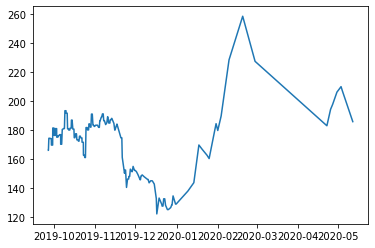

In [6]:
plt.plot(df_aigo_sc['Historical $Price/Eth'])

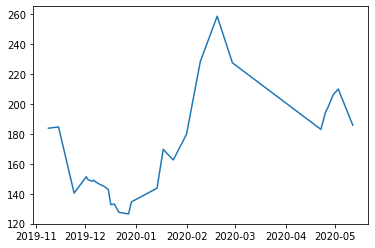

In [7]:
plt.plot(df_aigo_sc.groupby(df_aigo_sc.index.day).tail(1)['Historical $Price/Eth'])